In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [26]:
train_df = pd.read_csv('/Users/ishmamchoudhury/Downloads/Personal/PROJECTS/Kaggle/song-popularity-prediction/train.csv')
test_df = pd.read_csv('/Users/ishmamchoudhury/Downloads/Personal/PROJECTS/Kaggle/song-popularity-prediction/test.csv')

In [24]:
train_df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [27]:
test_df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


### Uniqueness and missing values

In [31]:
train_df.isna().any()
#song_duration_ms, acousticness, danceability, energy, intstrumentalness, 
#key, liveliness, loudness contains null

id                  False
song_duration_ms     True
acousticness         True
danceability         True
energy               True
instrumentalness     True
key                  True
liveness             True
loudness             True
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
song_popularity     False
dtype: bool

In [40]:
train_df.nunique()
#looks like key, audio_mode, time_signature are the only categorical values

id                  40000
song_duration_ms    31586
acousticness        36004
danceability        35972
energy              36021
instrumentalness    35999
key                    12
liveness            35911
loudness            36038
audio_mode              2
speechiness         39999
tempo               39993
time_signature          4
audio_valence       39998
song_popularity         2
dtype: int64

## EDA

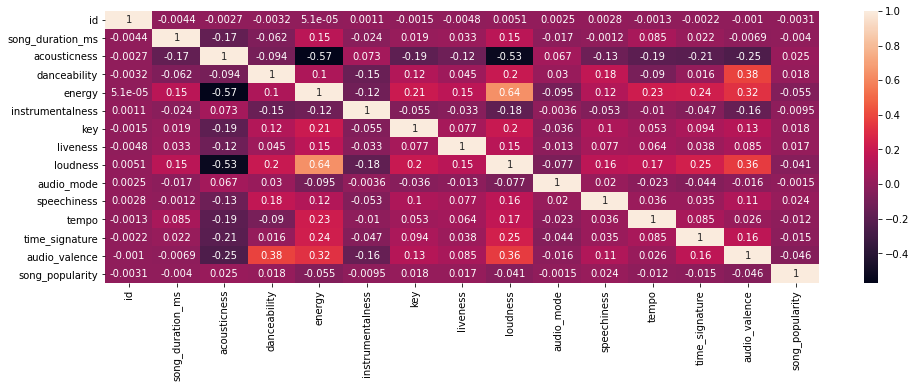

In [43]:
corrMatrix = train_df.corr()

plt.figure(figsize=(16,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Looks like [energy,loudness] [danceability,audiovalence] [audiovalence,loudness] are highly correlated. No columns are in high correlation with song popularity.

### Feature Analysis 

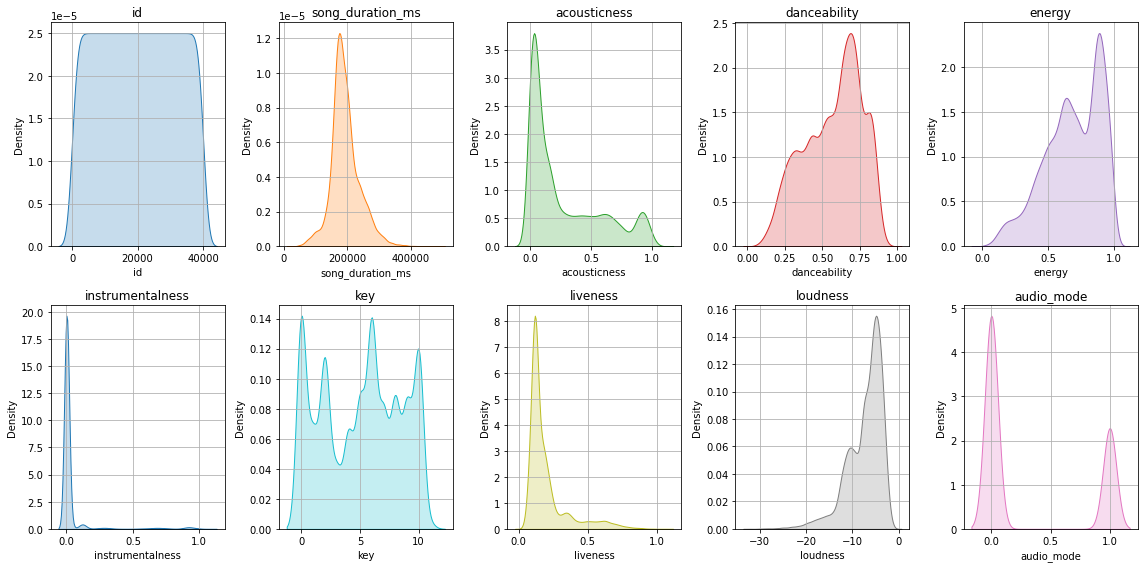

In [100]:
fig, ax = plt.subplots(2, 5, figsize=(16,8))
count = 0
count2 = 0
palette = sn.color_palette(None, 10)

for i in train_df.columns:
    if count<5:
        sn.kdeplot(train_df[i],color=palette[count],shade=True, ax = ax[0,count])
        ax[0,count].set_title(i)
        ax[0,count].grid()
        count += 1
    
    elif count>=5 & count2<5:
        sn.kdeplot(train_df[i],color=palette[-count2],shade=True, ax = ax[1,count2])
        ax[1,count2].set_title(i)
        ax[1,count2].grid()
        count2+=1
fig.tight_layout()
plt.show()

25424
14576


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


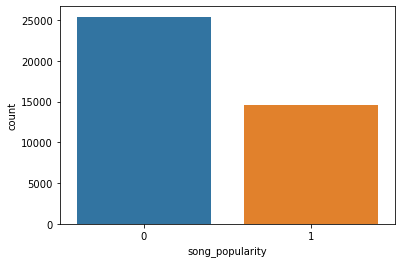

In [51]:
print(len(train_df[train_df['song_popularity']==0]))
print(len(train_df[train_df['song_popularity']==1]))
sn.countplot(train_df['song_popularity'])
plt.show()

There seems to be an uneven split on the target labels.

### Categorical Values 
Distribution for song_popularity

<AxesSubplot:xlabel='audio_mode', ylabel='song_popularity'>

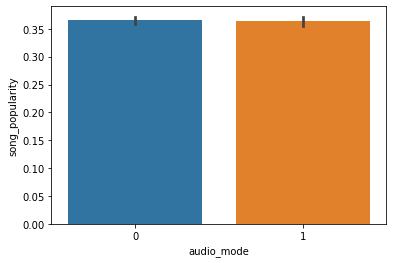

In [102]:
sn.barplot(x=train_df['audio_mode'], y=train_df['song_popularity'])

<AxesSubplot:xlabel='time_signature', ylabel='song_popularity'>

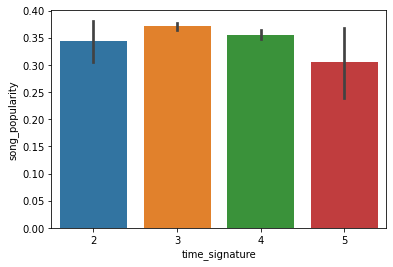

In [104]:
sn.barplot(x=train_df['time_signature'], y=train_df['song_popularity'])

<AxesSubplot:xlabel='key', ylabel='song_popularity'>

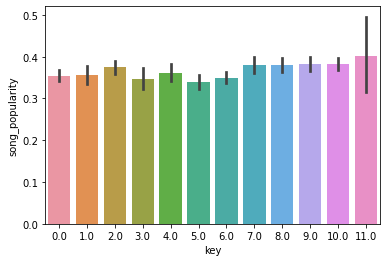

In [107]:
sn.barplot(x=train_df['key'], y=train_df['song_popularity'])

### Feature Distribution

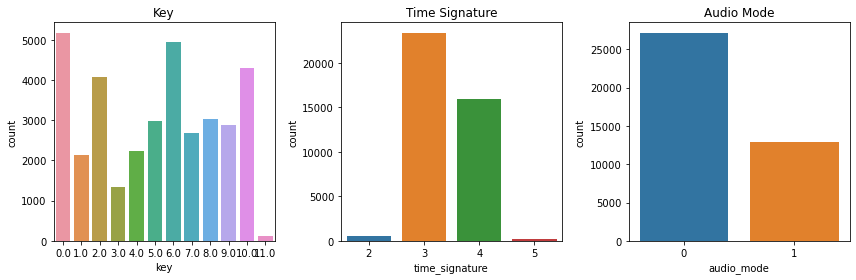

In [125]:
fig,ax = plt.subplots(1, 3, figsize=(12,4))
sn.countplot(x=train_df['key'], ax=ax[0])
ax[0].set_title('Key')
sn.countplot(x=train_df['time_signature'], ax=ax[1])
ax[1].set_title('Time Signature')
sn.countplot(x=train_df['audio_mode'], ax=ax[2])
ax[2].set_title('Audio Mode')
fig.tight_layout()
plt.show()

### Target Overlap

In [134]:
unpopular = train_df[train_df['song_popularity']==0]
popular = train_df[train_df['song_popularity']==1]

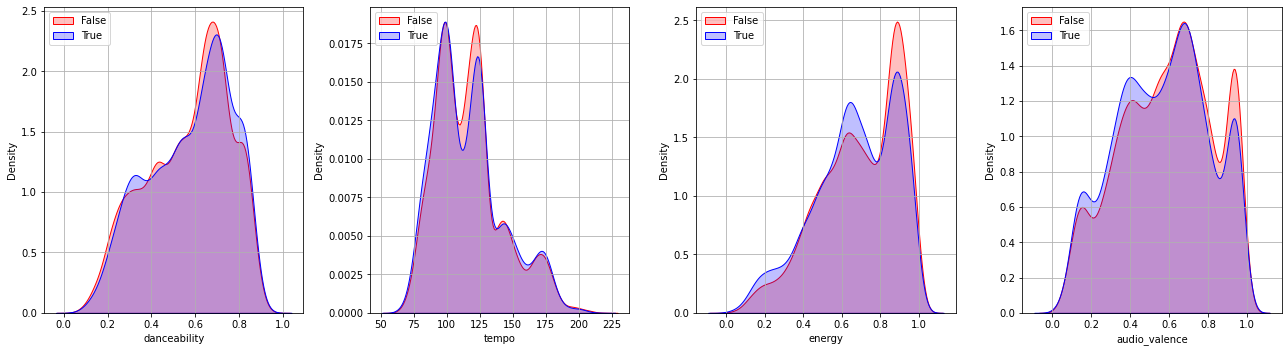

In [175]:
col = ['danceability','tempo','energy','audio_valence']
fig, ax = plt.subplots(1,4,figsize=(18,5))
for i in range(len(col)):
    sn.kdeplot(unpopular[col[i]], ax=ax[i], color= 'red',shade=True)
    sn.kdeplot(popular[col[i]], ax=ax[i], color= 'blue', shade=True)
    ax[i].legend(['False','True'],loc='upper left')
    ax[i].grid()

fig.tight_layout()
plt.show()

In [55]:
negative_popularity

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
5,5,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,39992,402730.0,0.006045,0.650712,NaN,0.002694,10.0,0.215647,-2.619994,0,0.059303,116.791531,4,0.525806,0
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0
